# ICT 781 - Day 10

# Overview and Final Remarks

Over the last few weeks, we have covered a great deal of material. We have examined data types, iteration, file I/O, and developer-designed functions. We have looked at the organization of Python code into modules and objects, and have also covered debugging and testing.

Today we will take another look at object-oriented programming from a new perspective. We will use objects from Numpy, Matplotlib, Pandas, and SciKit-Learn (sklearn).

# *Example: Fitting a line of best fit to synthetic data*

When learning new data analysis techniques, there are often two options: use carefully curated real-world data to illustrate the concept at hand, or synthesize your own data. Of course, real-world data offers a glimpse into the utility of the methods studied. However, high-quality and complete real-world data can be difficult to find for small-scale classroom demonstrations. Synthetic data holds the advantage of being readily available, free, and complete.

In this task, we'll generate some synthetic data. This data will be a *random variable*, meaning it will simulate some measurement that we might see in the real world. For example, adult height is a random variable. Using our random variable, we'll create a second variable that depends *linearly* on the original data. This means that if we make a change in our original data, our dependent variable should also change by a constant amount. This concept should become clearer below.

**Note:** Our purpose today is to review Python programming. Therefore, we'll leave much of the deeper statistical theory for another course.

## The Data

Using the `random` module, we'll create a data set of 1000 floating point numbers. For now, we won't assign any meaning or units to these numbers. We'll call this data our `X` random variable and state that `X` is independent and *normally distributed*. This roughly means that the histogram of the `X` variable looks like the famous **bell curve**. We'll plot the histogram of `X` to confirm this. We'll give `X` a mean of 5 and a standard deviation of 5.

From the `X` variable, we'll declare a second random variable `Y`. This variable will depend on `X` as follows: for every unit increase in `X`, we expect a 1.3 unit increase in `Y`, and when `X == 0`, we expect that `Y == -3.11`. Therefore, we declare `Y` as:
$$
    Y = 1.3X - 3.11.
$$

This gives us a perfect *linear* relationship between the variables `X` and `Y`, since the above expression for `Y` gives us the equation of a line. Since perfect linear relationships almost never exist in reality, we'll add some *random noise* to `Y` to better simulate real-world data. Our expression for `Y` is now
$$
    Y = 1.3X - 3.11 + \varepsilon,
$$
where $\varepsilon$ is a normally distributed variable with mean 5 and standard deviation 5. 

We'll save our data as a `.csv` file using the `csv` module.

**Note:** This step of saving the data to `.csv` is very artificial, since we'll just be importing the data back into the interpreter.

## The Model

Now, suppose we don't know the relationship between `X` and `Y`, but we suspect that it is linear. We then say that we expect the relationship
$$
    Y = \beta_1 X + \beta_0,
$$
where $\beta_0$ and $\beta_1$ are unknown parameters. If we knew these two parameters, the expression would give us the line of best fit for our observed data. This expression for `Y` is called the **model**.

The idea behind finding the parameters $\beta_0$ and $\beta_1$ is simple: find the values of $\beta_0$ and $\beta_1$ that minimize the distance of each data point to the line given by $Y = \beta_1 X + \beta_0$. The theory is more complicated, so we'll skip it and focus on the coding.

We'll load our data from the previously declared `.csv` file using `pandas` (the artificial step). Next, we will use Python to estimate the parameters $\beta_0$ and $\beta_1$ and then plot the resulting line of best fit. Fitting the line of best fit is called **Linear Regression**.

## Training and Testing

Ideally, we'd like to test how well our line of best fit matches our observed data. Therefore, we'll separate our `X` and `Y` data pairs into two data sets: one for training and one for testing.

The training data will be used to fit the model and estimate the $\beta$ parameters. Next, the testing data will be used to test how well our model can predict changes in `Y` based on changes in `X`. By testing our fitted model on the testing data, we generate the line of best fit.

## Evaluation

We'll evaluate how well our model does by qualitatively comparing the $\beta$ parameters to the known values -3.11 and 1.3. We'll also examine the **coefficient of determination** (also called the regression coefficient, r-squared, correlation coefficient,...). This number measures the extent to which the variability in the dependent variable may be explained by the independent variable.

In our case, the coefficient of determination expresses the extent to which variability in `Y` may be explained by `X`. This coefficient is always between 1 (variability in `Y` depends perfectly on `X`) and 0 (`Y` has no dependence on `X`).

## Implementation Notes

* The `random.normalvariate()` function is used to generate the random noise we'll be adding to our `Y` values.
* Although we've specified the standard deviation for our random variables, the `random.normalvariate()` function accepts *variance* as an input. However, variance is just the squared standard deviation.
* The step of exporting to `.csv` and then re-importing is a nuisance. In real-world applications, we would not have to do this.
* When we import the `.csv` file, `pandas` converts all columns to string by default. There are ways around this, but we'll use what we've learned in this course to quickly solve the problem.
* I will be using `sklearn`, a Python package for fitting a huge array of models to data, to fit our linear model. This package insists on inputs being `numpy` arrays, so we'll need a function that converts lists to `numpy` arrays.

**Caution: The data we are using is normally distributed. If you try to apply this method to variables that are either not normally distributed or are not linearly related, do not expect accurate results. You have been warned.**

# A Primer on Matplotlib

Though there are many sophisticated plotting packages for Python, Matplotlib is the foundational plotting package. Based on NumPy, Matplotlib works beautifully with pandas objects. There are many modules contained in Matplotlib. For general plotting, we'll import the `pyplot` module under the alias `plt`.

The cell magic `%matplotlib inline` tells the Jupyter notebook to allow plotting after the cell in which it is called. This cell magic only needs to be called once per notebook.

In [1]:
%matplotlib inline

# Import modules and packages
import random
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

Before we dig into the objects in Matplotlib, let's see an example.

## Loading and displaying images with Matplotlib
Matplotlib has functions for loading and displaying images. Using the image module of Matplotlib, we can call the `imread(<filepath>)` function to load an image into the interpreter. We then use the `imshow()` function from the pyplot module to display the image. I often place a semi-colon after the `imshow()` function is called to suppress printing the object type to the console.

Since the `cameraman.jpg` image is grayscale, we'll specify the colormap using the keyworded argument `cmap = 'gray'`.

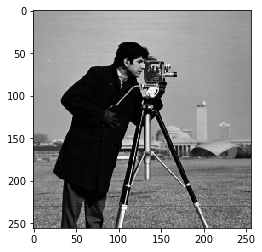

In [7]:
import matplotlib.image as mp

im = mp.imread('cameraman.jpg', 'w')
plt.imshow(im, cmap = 'gray');

Some common colormaps (the cmap argument) are bone, gray, hot, and summer.

In [8]:
im # The image is just a numpy array of integers between 0 and 255

array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 157, ..., 151, 152, 152],
       ...,
       [114, 132, 124, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 132, 130, 113]], dtype=uint8)

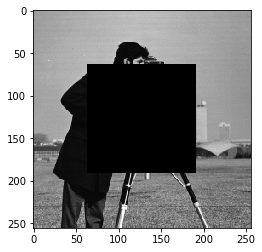

In [12]:
# That means we can change values of the image

im1 = im.copy()
im1[64:192, 64:192] = 0

plt.imshow(im1, cmap = 'gray');

## Matplotlib objects: the structure of plots

There are, of course, shortcuts to plotting with Matplotlib. However, understanding the underlying structure of Matplotlib plots opens a much wider range of customizable plots. In this section, we'll explore the fundamental objects in Matplotlib.

### The `figure` object

The most basic object in Matplotlib is the `figure`. This object contains attributes for the plotting metadata such as the axes, the plot resolution, the size of the plot, and the background color. When we generate a `figure`, we can also specify its `number` attribute so that we can access various `figure` objects by their `number`. All plotting metadata attributes can be passed as keyworded arguments, and are summarized in the following table.

|Optional Attribute|Options|Details|Default|
|---|---|---|---|
|`num`|Integer or string|Sets the `number` attribute for the `figure` object|`None`|
|`figsize`|`(float, float)`|Sets the size of the `figure` object to `(width, height)` *in inches*.|`(6.4, 4.8)`|
|`dpi`|Integer|Sets the `figure` resolution in *dots per inch*.|`100`|
|`facecolor`|Specified color or RGB tuple.|`w`, `white`<br>`r`, `red`<br>`g`, `green`<br>`b`, `blue`<br>`c`, `cyan`<br>`y`, `yellow`<br>`m`, `magenta`<br>`k`, `black`|Sets the background color of the `figure`.|`w` or `white`|
|`edgecolor`|Specified color or RGB tuple.|(see `facecolor`)|Sets the border color of the `figure`.|`w` or `white`|
|`frameon`|`bool`|`True`, `False`|If `False`, don't draw the frame of the `figure` object.|`True`|

In [13]:
fig1 = plt.figure(num = 1, 
                  figsize = (10, 5), 
                  dpi = 250, 
                  facecolor = 'm', 
                  edgecolor = 'k')

<Figure size 2500x1250 with 0 Axes>

Note that we passed in *inches* for the `figsize` attribute, but the `figure` has its size determined by `pixels`. This is because the `dpi` value is literally *dots per inch*. In other words, we specify the pixels per square inch and the `figsize`, and the Python interpreter does the arithmetic for us.

When `fig1` was generated, the console output was `<Figure size 2500x1250 with 0 Axes>`. This tells us that we have an empty `figure` object. We'll now focus on the second important object in Matplotlib: the `axes` object.

### The `axes` object

With a `figure` generated, we can place an `axes` object onto it. Think of this as creating a canvas (generating the `figure`) and then preparing an area of the canvas for your painting (generating the `axes`).

### Example: Plotting with figure and axes objects
Let's actually plot some axes to visualize what's going on. We'll create a `figure` with an `axes` object in one line using the `plt.subplots()` function.

**Note:** If you want to add more than one `axes` you can pass a tuple to the `plt.subplots()` function. The tuple will specify how many rows and columns of axes your `figure` will contain. You then access each separate `axes` object by indexing.

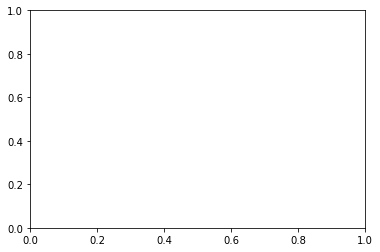

In [14]:
fig, ax = plt.subplots()

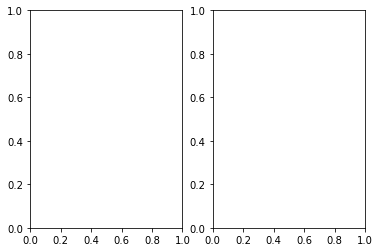

In [20]:
# Adding multiple axes to a single figure.

fig, ax = plt.subplots(1,2); # One row, two columns

In [21]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FC070AA58>,
      dtype=object)

In [22]:
# Access the first axes object contained in 'ax'
axis0 = ax[0]
axis0

In [26]:
# Our figure object is no longer empty

fig.axes

### `axes` methods

In the simplest cases, we'll be plotting some numeric values. An example of this is plotting the function $f(x) = x^2$, where $x$ is an array of 100 values between 0 and 1.

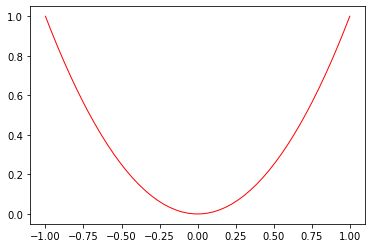

In [50]:
fig, ax = plt.subplots()

x = np.linspace(-1,1,50)    # Create 50 evenly spaced numbers between -1 and 1 (inclusive)
y = x**2

ax.plot(x, y, color='red', linewidth = 1);

For a full listing of the plotting methods of an `axes` object, try `dir(ax)`. I'll collect some of the more commonly used methods here.

|Method|Use|
|---|---|
|`ax.plot(<x>,<y>)`|Plot `x` on the horizontal axis and `y` on the vertical axis with a continuous line joining the points. Both variables need to be the same length|
|`ax.scatter(<x>,<y>)`|Make a scatterplot of the variables `x` and `y`.|
|`ax.hist(<var>)`|Plot a histogram of the `var` variable.|
|`ax.grid()`|Display the grid for an `axes` object.|
|`ax.fill_between(<line1>,<line2>)`|Fill in the plotted space between the two lines `line1` and `line2`.|


For individual options for each of the above methods, see the documentation.

We'll now continue with our regression example.

In [100]:
# Define our parameters
N = 1000
mean = 5
stdev = 5

# Generate the X and Y variables.
X = [random.normalvariate(mean, stdev**2) for i in range(N)]     # Second arg in normalvariate is variance = stdev**2.
Y = [1.3*item - 3.11 + random.normalvariate(0, stdev**2) for item in X]

# Separating X, Y data into training and testing sets.
X_train = X[:500]
Y_train = Y[:500]

X_test = X[500:]

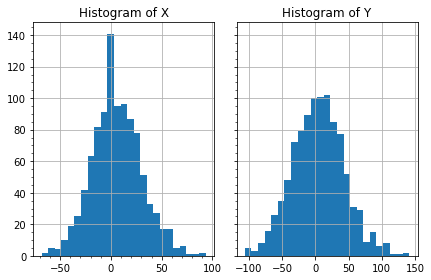

In [101]:
# Converting the data into numpy arrays.
X_train = np.asarray([[item] for item in X_train])
Y_train = np.asarray([[item] for item in Y_train])

X_test = np.asarray([[item] for item in X_test])

# Plot the histograms of X and Y.
fig1, ax1 = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax1[0].hist(X, bins = 25);
ax1[0].set_title('Histogram of X');
ax1[0].grid();
ax1[0].minorticks_on();

ax1[1].hist(Y, bins = 25);
ax1[1].set_title('Histogram of Y');
ax1[1].grid();

In [102]:
dir(ax1[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [103]:
ax1[0].get_xticks()

array([-100.,  -50.,    0.,   50.,  100.,  150.])

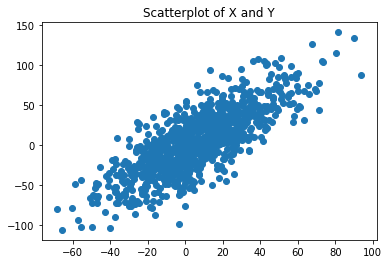

In [104]:
# Scatterplot of X and Y together.
fig2, ax2 = plt.subplots()
ax2.scatter(X,Y);
ax2.set_title('Scatterplot of X and Y');

In [105]:
# Save the data to csv
data = list(zip(X_train,Y_train,X_test))

header = ['X_train','Y_train','X_test']

with open('regress.csv', 'w', newline = '') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = header)
    
    writer.writeheader()
    
    for line in data:
        writer.writerow({key: [float(value)] for key,value in zip(header, line)})
        
### This marks the end of the part that real-world data would have provided us ###

In [106]:
# Reading in the data.
dataset = pd.read_csv('regress.csv')
dataset

,X_train,Y_train,X_test
0,[23.36864106243339],[26.563217726921156],[-27.08375609268112]
1,[60.23339927921748],[67.24387217921769],[-15.43586435407364]
2,[11.173666155779152],[12.006317988810629],[-3.5675573024287957]
3,[31.465786816842595],[23.54979831744476],[13.042939207868539]
4,[9.247867778090935],[-8.32477224319206],[-24.895043179697712]
...,...,...,...
495,[-6.2390958616550325],[-49.40034642984021],[10.057189936315684]
496,[46.56248716837995],[59.685291428641776],[-7.420879413336536]
497,[20.71058098677594],[13.855936800726306],[-29.78083791793864]
498,[-3.438408026481543],[-10.512552994301812],[4.201472615106541]


In [107]:
X_train = dataset['X_train']
Y_train = dataset['Y_train']

X_test = dataset['X_test']

# Exporting our data to csv converted everything to strings, we we'll change it back.
X_train = [[float(item.strip('[]'))] for item in X_train]
Y_train = [[float(item.strip('[]'))] for item in Y_train]

X_test = [[float(item.strip('[]'))] for item in X_test]

# Checking our work
X_train

[[23.36864106243339],
 [60.23339927921748],
 [11.173666155779152],
 [31.465786816842595],
 [9.247867778090935],
 [-4.701839141747314],
 [15.401968991287019],
 [0.8936699897541791],
 [22.988233964336715],
 [31.17290306168045],
 [-17.154192453635428],
 [47.0032331501015],
 [32.959516894565795],
 [-2.477217111851914],
 [26.504585638188882],
 [33.0889666561113],
 [27.37179554190238],
 [19.200599199702545],
 [13.98867466554386],
 [0.11820741813558477],
 [-2.790290087536274],
 [4.753541960024025],
 [3.6920075457705086],
 [-18.28111558633146],
 [-47.18161672790335],
 [46.51576234209401],
 [52.63495521722811],
 [-5.31559285929735],
 [18.165070379112592],
 [-3.5928593682458256],
 [35.00986324325966],
 [-8.35627071406042],
 [-32.300447387827646],
 [0.27538526574071565],
 [-3.0114704158428243],
 [16.59278787017481],
 [42.91814534047836],
 [-2.2235923384125504],
 [50.74055215454379],
 [49.079388955978565],
 [11.342476346717369],
 [17.371090128092757],
 [-24.074133918320943],
 [18.95145824461652],


In [108]:
### Fitting the model ###

# Create an instance of the LinearRegression object.
model = linear_model.LinearRegression()

# Call the 'fit' method of the LinearRegression Object
model.fit(X_train, Y_train)

# Testing the model and generating the line of best fit.
Y_predicted = model.predict(X_test);

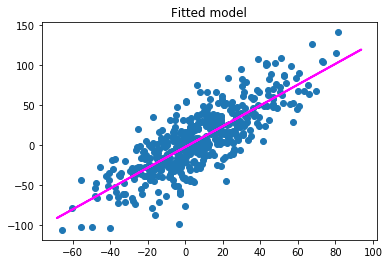

In [109]:
# Scatterplot of X_train and Y_train with line of best fit.
fig3, ax3 = plt.subplots()

ax3.scatter(X_train, Y_train, marker = 'o');
ax3.plot(X_test, Y_predicted, color = 'magenta', linewidth = 2);
ax3.set_title('Fitted model');

In [110]:
# Comparing our fitted model parameters to our known parameters.
Beta0 = -3.11
Beta1 = 1.3

Beta0_fitted = model.intercept_[0]
Beta1_fitted = model.coef_[0][0]

print('The fitted value for beta_0 was {} (true value was {}).'.format(Beta0_fitted, Beta0))
print('The fitted value for beta_1 was {} (true value was {}).'.format(Beta1_fitted, Beta1))
print('The coefficient of determination was {}.'.format(model.score(X_train, Y_train)))

The fitted value for beta_0 was -2.1116104322818545 (true value was -3.11).
The fitted value for beta_1 was 1.2988328515766443 (true value was 1.3).
The coefficient of determination was 0.6462683913245819.


## Doing the Regression with Object-Oriented Programming

In [111]:
import random
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

class SyntheticLinearModel:
    """ Object-oriented approach to above problem. """
    
    def __init__(self, filepath, N=100, mean=0, stdev=1, Beta0=-3.11, Beta1=1.3):
        self.num_obs = N
        self.mean = mean
        self.stdev = stdev
        self.filepath = filepath
        self.Beta0 = Beta0
        self.Beta1 = Beta1
        
    def generate_data(self):
        """ Function to generate training and testing data. 
            Results in three attributes being set: X_train, Y_train, and
            X_test, where the relationship between X and Y is linear.

            Output:
            -------
            X_train := random variable in a numpy array of length num_obs/2
            Y_train := random variable (depends on X linearly) in a numpy array of length num_obs/2
            X_test  := random variable in a numpy array of length num_obs/2
        """
        # Define the middle of the data; used to split the data 50/50 (training/testing).
        midpoint = int(self.num_obs/2)

        # Generate the X and Y variables.
        X = [random.normalvariate(self.mean, self.stdev**2) for _ in range(self.num_obs)]     # Second arg in normalvariate is variance = stdev**2.
        Y = [self.Beta1*item + self.Beta0 + random.normalvariate(0, self.stdev**2) for item in X]

        # Separating X, Y data into training and testing sets, 
        # and converting the data into numpy arrays.
        self.X_train = np.asarray([[item] for item in X[:midpoint]])
        self.Y_train = np.asarray([[item] for item in Y[:midpoint]])

        self.X_test = np.asarray([[item] for item in X[midpoint:]])
        
    def scatter_plot(self, fit = False):
        """ Function to plot scatterplot, with option to plot the line of best fit. 

            Inputs:
            -------
            fit := boolean; if True, plot line of best fit

            Output:
            -------
            Scatter plot with overlaid plot of line of best fit
        """

        # Scatterplot of X and Y together.
        fig, ax = plt.subplots()
        ax.scatter(self.X_train,self.Y_train);
        ax.set_title('Scatterplot of X and Y');

        if fit:
            ax.set_title('Fitted model');
            plt.plot(self.X_test, self.Y_predicted, color = 'red', linewidth = 2);
            
    def save_to_csv(self):
        """ Save data to csv file. """

        data = list(zip(self.X_train,self.Y_train,self.X_test))

        header = ['X_train','Y_train','X_test']

        with open(self.filepath, 'w', newline = '') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames = header)

            writer.writeheader()

            for line in data:
                writer.writerow({key: [float(value)] for key,value in zip(header, line)})
    
    def read_from_csv(self):
        """ Reads in synthetic data and sets attributes X_train, Y_train, X_test. """

        dataset = pd.read_csv(self.filepath)

        # Exporting our data to csv converted everything to strings, we we'll change it back.
        self.X_train = [[float(item.strip('[]'))] for item in dataset['X_train']]
        self.Y_train = [[float(item.strip('[]'))] for item in dataset['Y_train']]

        self.X_test = [[float(item.strip('[]'))] for item in dataset['X_test']]
        
    def fit_model(self):
        """ Fit linear regression model to X,Y data. 
        
            Sets attributes model and Y_predicted.
        """
        self.model = linear_model.LinearRegression()
        self.model.fit(self.X_train, self.Y_train)

        # Testing the model and generating the line of best fit.
        self.Y_predicted = self.model.predict(self.X_test);
        
        self.Beta0_fitted = self.model.intercept_[0]
        self.Beta1_fitted = self.model.coef_[0][0]
        
        self.r_squared = self.model.score(self.X_train, self.Y_train)
        
    def compare_results(self):
        """ Compare the coefficients from the model to the known ones. """
        
        print('The fitted value for beta_0 was {} (true value was {}).'.format(self.Beta0_fitted, self.Beta0))
        print('The fitted value for beta_1 was {} (true value was {}).'.format(self.Beta1_fitted, self.Beta1))
        print('The coefficient of determination was {}.'.format(self.r_squared))
    
    def run_all(self):
        """ Generate the data, fit the model, plot the results, and compare. """
        
        self.generate_data()
        self.save_to_csv()
        self.read_from_csv()
        self.fit_model()
        self.scatter_plot(fit = True)
        self.compare_results()

The fitted value for beta_0 was -3.2758865547403406 (true value was -3.11).
The fitted value for beta_1 was 1.3077820444372814 (true value was 1.3).
The coefficient of determination was 0.6501767616821397.


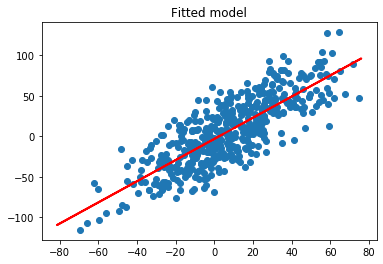

In [112]:
example_model = SyntheticLinearModel('regress1.csv', N=1000, mean=5, stdev=5, Beta0=-3.11, Beta1=1.3)
# example_model.generate_data()
# example_model.scatter_plot()
example_model.run_all()

# Exercises

1. Play with the above model by changing `mean` and `stdev` to be different values. Both must be positive.

In [113]:
import random
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

class SyntheticLinearModel:
    """ Object-oriented approach to above problem. """
    
    def __init__(self, filepath, N=100, mean=0, stdevX=1, stdevY=1, Beta0=-3.11, Beta1=1.3):
        self.num_obs = N
        self.mean = mean
        self.stdevX = stdevX
        self.stdevY = stdevY
        self.filepath = filepath
        self.Beta0 = Beta0
        self.Beta1 = Beta1
        
    def generate_data(self):
        """ Function to generate training and testing data. 
            Results in three attributes being set: X_train, Y_train, and
            X_test, where the relationship between X and Y is linear.

            Output:
            -------
            X_train := random variable in a numpy array of length num_obs/2
            Y_train := random variable (depends on X linearly) in a numpy array of length num_obs/2
            X_test  := random variable in a numpy array of length num_obs/2
        """
        # Define the middle of the data; used to split the data 50/50 (training/testing).
        midpoint = int(self.num_obs/2)

        # Generate the X and Y variables.
        X = [random.normalvariate(self.mean, self.stdevX**2) for _ in range(self.num_obs)]     # Second arg in normalvariate is variance = stdev**2.
        Y = [self.Beta1*item + self.Beta0 + random.normalvariate(0, self.stdevY**2) for item in X]

        # Separating X, Y data into training and testing sets, 
        # and converting the data into numpy arrays.
        self.X_train = np.asarray([[item] for item in X[:midpoint]])
        self.Y_train = np.asarray([[item] for item in Y[:midpoint]])

        self.X_test = np.asarray([[item] for item in X[midpoint:]])
        
    def scatter_plot(self, fit = False):
        """ Function to plot scatterplot, with option to plot the line of best fit. 

            Inputs:
            -------
            fit := boolean; if True, plot line of best fit

            Output:
            -------
            Scatter plot with overlaid plot of line of best fit
        """

        # Scatterplot of X and Y together.
        fig, ax = plt.subplots()
        ax.scatter(self.X_train,self.Y_train);
        ax.set_title('Scatterplot of X and Y');

        if fit:
            ax.set_title('Fitted model');
            plt.plot(self.X_test, self.Y_predicted, color = 'red', linewidth = 2);
            
    def save_to_csv(self):
        """ Save data to csv file. """

        data = list(zip(self.X_train,self.Y_train,self.X_test))

        header = ['X_train','Y_train','X_test']

        with open(self.filepath, 'w', newline = '') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames = header)

            writer.writeheader()

            for line in data:
                writer.writerow({key: [float(value)] for key,value in zip(header, line)})
    
    def read_from_csv(self):
        """ Reads in synthetic data and sets attributes X_train, Y_train, X_test. """

        dataset = pd.read_csv(self.filepath)

        # Exporting our data to csv converted everything to strings, we we'll change it back.
        self.X_train = [[float(item.strip('[]'))] for item in dataset['X_train']]
        self.Y_train = [[float(item.strip('[]'))] for item in dataset['Y_train']]

        self.X_test = [[float(item.strip('[]'))] for item in dataset['X_test']]
        
    def fit_model(self):
        """ Fit linear regression model to X,Y data. 
        
            Sets attributes model and Y_predicted.
        """
        self.model = linear_model.LinearRegression()
        self.model.fit(self.X_train, self.Y_train)

        # Testing the model and generating the line of best fit.
        self.Y_predicted = self.model.predict(self.X_test);
        
        self.Beta0_fitted = self.model.intercept_[0]
        self.Beta1_fitted = self.model.coef_[0][0]
        
        self.r_squared = self.model.score(self.X_train, self.Y_train)
        
    def compare_results(self):
        """ Compare the coefficients from the model to the known ones. """
        
        print('The fitted value for beta_0 was {} (true value was {}).'.format(self.Beta0_fitted, self.Beta0))
        print('The fitted value for beta_1 was {} (true value was {}).'.format(self.Beta1_fitted, self.Beta1))
        print('The coefficient of determination was {}.'.format(self.r_squared))
    
    def run_all(self):
        """ Generate the data, fit the model, plot the results, and compare. """
        
        self.generate_data()
        self.save_to_csv()
        self.read_from_csv()
        self.fit_model()
        self.scatter_plot(fit = True)
        self.compare_results()

The fitted value for beta_0 was -3.2366573385757347 (true value was -3.11).
The fitted value for beta_1 was 1.30310066951443 (true value was 1.3).
The coefficient of determination was 0.9208716119837366.


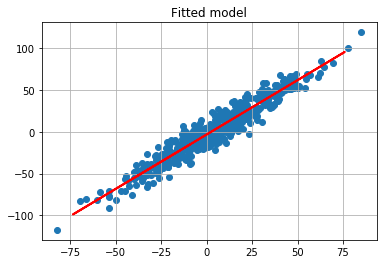

In [118]:
example_model = SyntheticLinearModel('regress1.csv', N=1000, mean=5, stdevX=5, stdevY=3.14, Beta0=-3.11, Beta1=1.3)
example_model.run_all()
plt.grid()

2. Change the `mean` and `stdev` again, but this time only change them in the definition of `Y`. Compare the results to the previous model.

3. Instead of fitting the `LinearRegression` model, use `Y_predicted = np.polyfit(x, y, 2)` to fit a 2nd degree polynomial to the data. The model now takes the form $Y = \beta_0 + \beta_1X + \beta_2X^2 $. Take the following steps to fit the model:
    * Declare the `X` data as a random variable as above.
    * Convert the entire list `X` into a `numpy` array using `X = np.asarray(X)`.
    * Declare `Y` as above.
    * Separate the training data and fit the model to the training data.
    * Plot the resulting polynomial and compare to the linear model.

In [154]:
import random
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

class SyntheticLinearModel:
    """ Object-oriented approach to above problem. """
    
    def __init__(self, filepath, N=100, mean=0, stdevX=1, stdevY=1, Beta0=-3.11, Beta1=1.3):
        self.num_obs = N
        self.mean = mean
        self.stdevX = stdevX
        self.stdevY = stdevY
        self.filepath = filepath
        self.Beta0 = Beta0
        self.Beta1 = Beta1
        
    def generate_data(self):
        """ Function to generate training and testing data. 
            Results in three attributes being set: X_train, Y_train, and
            X_test, where the relationship between X and Y is linear.

            Output:
            -------
            X_train := random variable in a numpy array of length num_obs/2
            Y_train := random variable (depends on X linearly) in a numpy array of length num_obs/2
            X_test  := random variable in a numpy array of length num_obs/2
        """
        # Define the middle of the data; used to split the data 50/50 (training/testing).
        midpoint = int(self.num_obs/2)

        # Generate the X and Y variables.
        X = [random.normalvariate(self.mean, self.stdevX**2) for _ in range(self.num_obs)]     # Second arg in normalvariate is variance = stdev**2.
        Y = [self.Beta1*item + self.Beta0 + random.normalvariate(0, self.stdevY**2) for item in X]
        self.X = np.asarray(X[:midpoint])
        self.Y = np.asarray(Y[:midpoint])

        # Separating X, Y data into training and testing sets, 
        # and converting the data into numpy arrays.
        self.X_train = np.asarray([[item] for item in X[:midpoint]])
        self.Y_train = np.asarray([[item] for item in Y[:midpoint]])

        self.X_test = np.asarray([[item] for item in X[midpoint:]])
        
    def scatter_plot(self, fit = False, poly = False):
        """ Function to plot scatterplot, with option to plot the line of best fit. 

            Inputs:
            -------
            fit := boolean; if True, plot line of best fit

            Output:
            -------
            Scatter plot with overlaid plot of line of best fit
        """

        # Scatterplot of X and Y together.
        fig, ax = plt.subplots()
        ax.scatter(self.X_train,self.Y_train);
        ax.set_title('Scatterplot of X and Y');

        if fit:
            ax.set_title('Fitted model');
            plt.plot(self.X_test, self.Y_predicted, color = 'red', linewidth = 2);
        if fit and poly:
            x = np.linspace(-100, 100, 1000)
            B2 = self.Y_predicted_poly[0]
            B1 = self.Y_predicted_poly[1]
            B0 = self.Y_predicted_poly[2]
            
            y = B2*(x**2) + B1*x + B0*np.ones(1000)
            
            ax.set_title('Fitted model - linear and polynomial');
            plt.plot(x, y, color = 'magenta', linewidth = 2);
            plt.grid();
            
            
    def save_to_csv(self):
        """ Save data to csv file. """

        data = list(zip(self.X_train,self.Y_train,self.X_test))

        header = ['X_train','Y_train','X_test']

        with open(self.filepath, 'w', newline = '') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames = header)

            writer.writeheader()

            for line in data:
                writer.writerow({key: [float(value)] for key,value in zip(header, line)})
    
    def read_from_csv(self):
        """ Reads in synthetic data and sets attributes X_train, Y_train, X_test. """

        dataset = pd.read_csv(self.filepath)

        # Exporting our data to csv converted everything to strings, we we'll change it back.
        self.X_train = [[float(item.strip('[]'))] for item in dataset['X_train']]
        self.Y_train = [[float(item.strip('[]'))] for item in dataset['Y_train']]

        self.X_test = [[float(item.strip('[]'))] for item in dataset['X_test']]
        
    def fit_model(self):
        """ Fit linear regression model to X,Y data. 
        
            Sets attributes model and Y_predicted.
        """
        
#         print(np.asarray(self.X_train).reshape(len(self.X_train),))
        
#         self.X_train = [y for x in self.X_train for y in x]
#         print(self.X_train)

        self.model = linear_model.LinearRegression()
                
        self.model.fit(self.X_train, self.Y_train)

        # Testing the model and generating the line of best fit.
        self.Y_predicted = self.model.predict(self.X_test);
        self.Y_predicted_poly = np.polyfit(self.X, self.Y, 2);
        
        self.Beta0_fitted = self.model.intercept_[0]
        self.Beta1_fitted = self.model.coef_[0][0]
        
        self.r_squared = self.model.score(self.X_train, self.Y_train)
        
    def compare_results(self):
        """ Compare the coefficients from the model to the known ones. """
        
        print('The fitted value for beta_0 was {} (true value was {}).'.format(self.Beta0_fitted, self.Beta0))
        print('The fitted value for beta_1 was {} (true value was {}).'.format(self.Beta1_fitted, self.Beta1))
        print('The coefficient of determination was {}.'.format(self.r_squared))
    
    def run_all(self):
        """ Generate the data, fit the model, plot the results, and compare. """
        
        self.generate_data()
        self.save_to_csv()
        self.read_from_csv()
        self.fit_model()
        self.scatter_plot(fit = True, poly = True)
        self.compare_results()

The fitted value for beta_0 was -3.245788338245974 (true value was -3.11).
The fitted value for beta_1 was 1.2977350469388873 (true value was 1.3).
The coefficient of determination was 0.918183182100635.


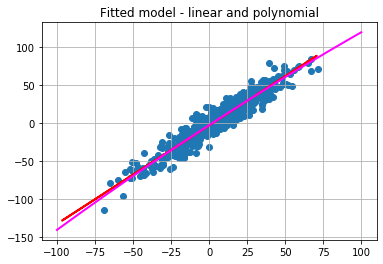

In [156]:
example_model = SyntheticLinearModel('regress1.csv', N=1000, mean=5, stdevX=5, stdevY=3.1, Beta0=-3.11, Beta1=1.3)
example_model.run_all()

4. Write unit tests for **one** of the methods in our regression object. Execute the unit tests and debug if necessary.